In [347]:
import networkx as nx
from pymatgen.core.structure import Structure
import os
os.chdir('/home/lucasperea/Documents/GithubRep/GraphMaterials/')
from GraphFunc.ZeoDataframeFunction import ZeoDataframe
from GraphFunc.ConexionFunction import Conexion
from pymatgen.io.cif import CifWriter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
os.getcwd()

'/home/lucasperea/Documents/GithubRep/GraphMaterials'

In [345]:
vertex_table = vertex_table.append({'coord_x':vertex_table.loc[vertex_table['key']  == str(int(destination) + x_1), ['coord_x']].values[0][0], 'coord_y':vertex_table.loc[vertex_table['key']  == str(int(destination) + x_1), ['coord_y']].values[0][0], 'coord_z':vertex_table.loc[vertex_table['key']  == str(int(destination) + x_1), ['coord_z']].values[0][0],'min_dist_atom':vertex_table.loc[vertex_table['key']  == str(int(destination) + x_1),['min_dist_atom']].values[0][0],'key':str(int(destination) + x_1)},ignore_index = True)

70

In [389]:

path_nt2 = './Netwrk/EDI.nt2'
multiplier = [1,1,1]
box = np.array([6.926, 6.926, 6.410])

edge_table, vertex_table = ZeoDataframe(path_nt2, multiplier, box)
conexion = Conexion(vertex_table, edge_table)

DataFrame DONE


In [261]:
G = nx.MultiDiGraph()
G.add_edge(1, 2, **{'weight': 15, 'max': 3})
G.add_edge(1, 3, **{'weight': 30, 'max': 4})
G.add_edge(2, 3, **{'weight': 20, 'max': 3})
G.add_edge(2, 3, **{'weight': 20, 'max': 5})


def get_edge_weight(u, v):
    """Return the minimum weight of all edges between nodes u and v."""
    return min([e['weight'] for e in G.get_edge_data(u, v).values()])


def weighted_path_score(path):
    """Sum of edge weights in path."""
    edges = zip(path, path[1:])
    return sum(get_edge_weight(u, v) for u, v in edges)


paths = [tuple(p) for p in nx.all_simple_paths(G, 1, 1)]

# sort using the weighted path score
print(sorted(set(paths), key=weighted_path_score))

[]


In [262]:
os.getcwd()

'/home/lucasperea/Documents/GithubRep/GraphMaterials'

In [390]:
# strc = Structure.from_file('../CifFiles/EDI.cif')

In [264]:
strc.make_supercell([2,2,1])

In [265]:
len(strc)

60

In [391]:
# CifWriter(strc).write_file('../Netwrk/EDI.cif')

In [398]:
path_to_file = './Netwrk/EDI.nt2'

G = nx.Graph()
with open(path_to_file) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
#                     print(key)
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])
        
                    G.add_node(key, coord=np.array([coord_x, coord_y, coord_z]), rad_max_sph=min_dist_atom,
                              pagerank=1)

    #                 vertex_table = vertex_table.append({'coord_x':coord_x, 'coord_y':coord_y, 'coord_z':coord_z,
    #                                                     'min_dist_atom':min_dist_atom, 'key':key},ignore_index = True)


        x_1 = len(list(range(0,(sorted(list(G.nodes), reverse=True)[0] + 1))))
        
        
        
        if line == 'Edge table:\n':
            

            while line:

                line = f.readline()
                if line == '':
                    break
                line_list = line.split()
                origin = int(line_list[0])
                destination = int(line_list[2])
                larger_radius = float(line_list[3])
                x_sim = int(line_list[4])
                y_sim = int(line_list[5])
                z_sim = int(line_list[6])
                if x_sim == 1:
                    G.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + np.array([box[0], 0, 0]),
                               rad_max_sph=G.nodes[destination]['rad_max_sph'], pagerank=1)
                    
                    G.add_edge(origin, destination + x_1, rad_max_sph=larger_radius)
                    print(destination + x_1)
                else:
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                        G.add_edge(origin, destination, rad_max_sph=larger_radius)
                        
                    else:
                        pass
                    
                
                
                
#                 if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
#                     pass
#                     edge_table = edge_table.append({'origin':origin, 'destination': destination, 'x_sim':x_sim,
#                                                     'y_sim':y_sim, 'z_sim':z_sim,'larger_radius':larger_radius},
#                                                    ignore_index = True)
                    #print('change')


80
84
98
105
103
130
132
137
138
139


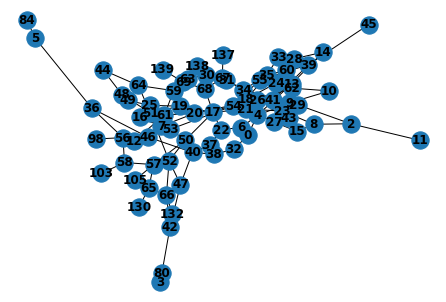

In [268]:


nx.draw(G, with_labels=True, font_weight='bold')

In [291]:
path_to_file = './Netwrk/EDI.nt2'

H = nx.Graph()

box = np.array([6.926, 6.926, 6.410])

with open(path_to_file) as f:
    line = ' '

    while line:
        line = f.readline()

        if line == 'Vertex table:\n':
            
            while line:

                line = f.readline()
                
                if line == '\n':
                    break
                else:
                    line_list = line.split()
                    key = int(line_list[0])
                    coord_x = float(line_list[1])
                    coord_y = float(line_list[2])
                    coord_z = float(line_list[3])
                    min_dist_atom = float(line_list[4])

                    H.add_node(key + x_1, coord=np.array([coord_x + box[0], coord_y, coord_z]), 
                               rad_max_sph=min_dist_atom, pagerank=1)
        
        elif line == 'Edge table:\n':
            while line:

                line = f.readline()
                if line == '':
                    break
                else:
                    line_list = line.split()
                    origin = int(line_list[0])
                    destination = int(line_list[2])
                    larger_radius = float(line_list[3])
                    x_sim = int(line_list[4])
                    y_sim = int(line_list[5])
                    z_sim = int(line_list[6])
                    if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
                        H.add_node(destination + x_1, coord=G.nodes[destination]['coord'] + 
                                   np.array([box[0], 0, 0]), rad_max_sph=G.nodes[destination]['rad_max_sph'])

    #                     G.add_edge(origin, destination + x_1, weight=larger_radius)
                        H.add_edge(origin + x_1, destination + x_1, rad_max_sph=larger_radius)
                    elif x_sim == -1:
                        pass
                    else:
                        pass

                    
                
                
                
#                 if sum([abs(x_sim), abs(y_sim), abs(z_sim)]) == 0:
#                     pass
#                     edge_table = edge_table.append({'origin':origin, 'destination': destination, 'x_sim':x_sim,
#                                                     'y_sim':y_sim, 'z_sim':z_sim,'larger_radius':larger_radius},
#                                                    ignore_index = True)
                    #print('change')
               

In [292]:
G.add_nodes_from(H.nodes)
G.add_edges_from(H.edges)


In [296]:
G[117][110]

{'rad_max_sph': 0.498201}

In [294]:
H.edges[edge[0], edge[1]]

{'rad_max_sph': 2.51601}

In [295]:
for node in H.nodes:
    for attr in H.nodes[node]:
        G.nodes[node][attr] = H.nodes[node][attr]
        
for edge in H.edges:
    for attr in H.edges[edge[0], edge[1]]:
        G.edges[edge][attr] = H.edges[edge][attr]    

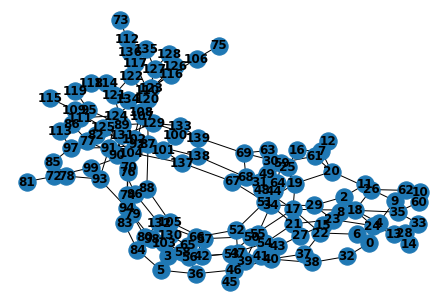

In [297]:
nx.draw(G, with_labels=True, font_weight='bold')

In [244]:
# nx.maximum_flow(G, _s=0, _t=70, capacity='weight')[1]

In [400]:
neigh_dic = {}
for n, nbrs in G.adj.items():
    neigh = []
    for nbr, eattr in nbrs.items():
        neigh.append(nbr)
        
        
    neigh_dic[str(n)] = neigh
        

In [399]:
conexion['3']
edge_table.loc[edge_table['destination'] == '80']
# vertex_table.loc[vertex_table['key'] == '80']
# [3, 79, 132]
conexion['80']

{'3': 0.5}

In [414]:
def PageRank(graph, iteration, conexion, neigh_dic):
        for i in range(iteration):
            last = PageRank_one_iter(graph, conexion, neigh_dic)
        return(last)

def PageRank_one_iter(graph, conexion, neigh_dic):
    node_list = sorted(list(graph.nodes))
    for node in node_list:
        update_pagerank(node, conexion, neigh_dic, graph)
#         graph.normalize_pagerank()
    pagerank_list = np.asarray([graph.nodes[node]['pagerank'] for node in node_list], dtype='float32')
    return pagerank_list

def update_pagerank(selfnode, conexion, neigh_dic, graph):
    in_neighbors = neigh_dic[str(selfnode)] #self.parents
#     print(in_neighbors, selfnode)
    pagerank_sum = sum(graph.nodes[node]['pagerank']*conexion[str(selfnode)][str(node)]
                       for node in in_neighbors)
#     print(selfnode)
    graph.nodes[selfnode]['pagerank'] = pagerank_sum
    
    
info = PageRank(G, 25, conexion,neigh_dic)
np.argsort(info)
x = G.nodes[list(G.nodes)[16]]
G.nodes[list(G.nodes)[16]]

{'coord': array([3.463, 3.463, 3.205]),
 'rad_max_sph': 2.65996,
 'pagerank': 7.456862118963146}

In [340]:
                        vertex_table = vertex_table.append({
                            'coord_x':vertex_table.loc[vertex_table['key']  == str(destination), ['coord_x']].values[0][0] + box[0],                               
                            'coord_y':vertex_table.loc[vertex_table['key']  == str(destination),['coord_y']].values[0][0],                                 'coord_z':vertex_table.loc[vertex_table['key']  == str(destination), ['coord_z']].values[0][0],
                            'min_dist_atom':vertex_table.loc[vertex_table['key']  == str(int(destination),['min_dist_atom']].values[0][0],
                            'key':str(int(destination) + x_1)},ignore_index = True)

1

<IPython.core.display.Javascript object>


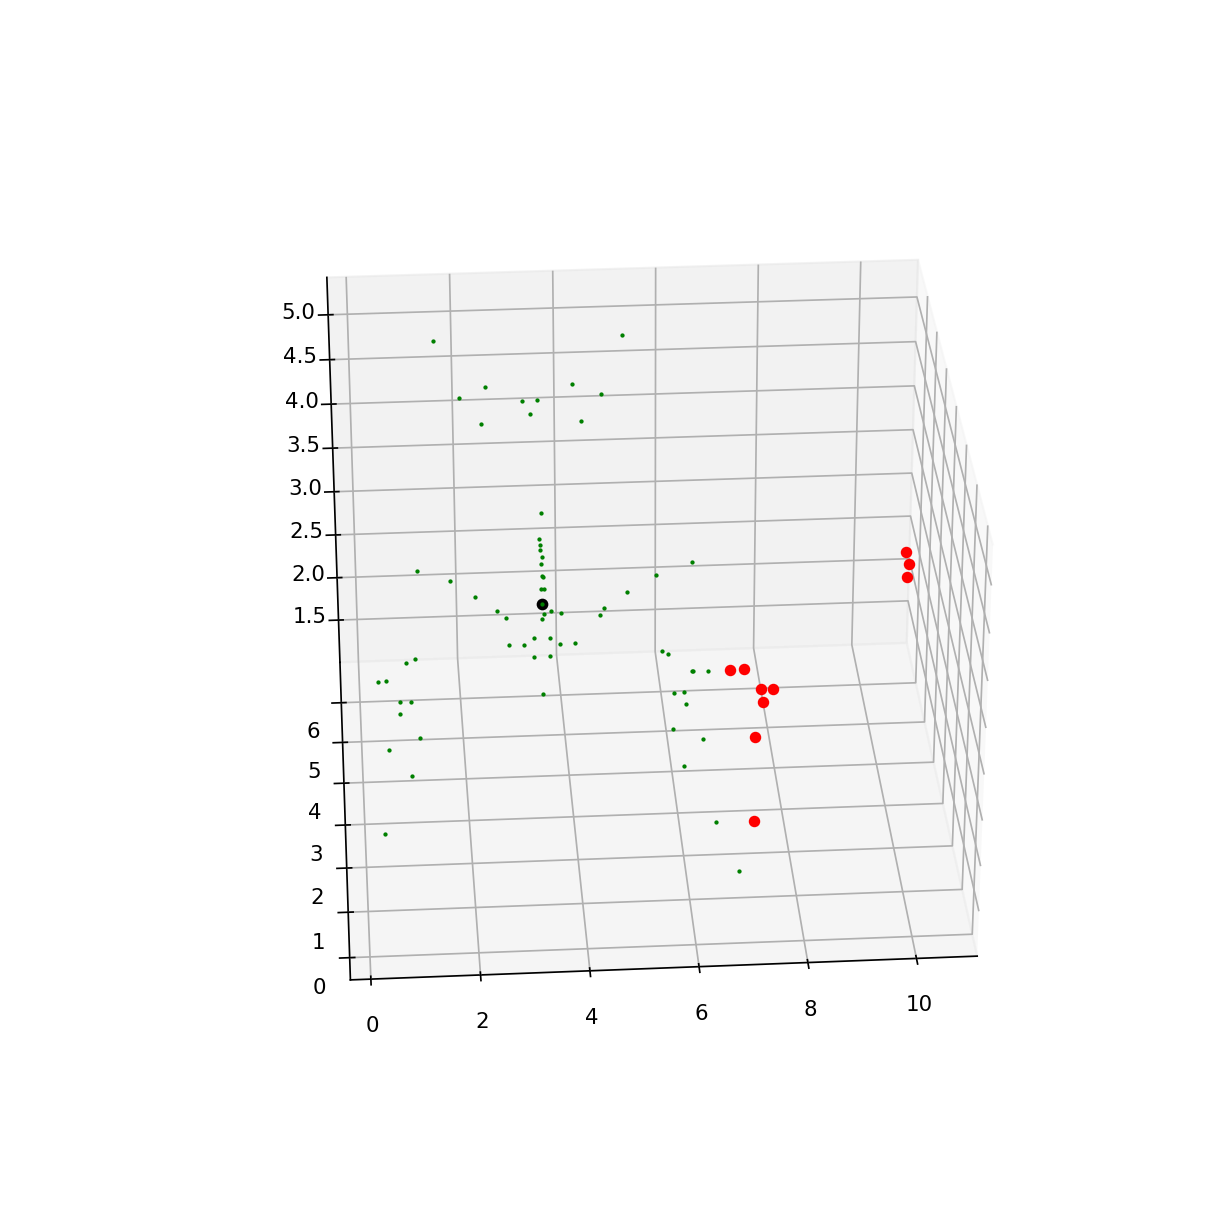

In [417]:
%matplotlib notebook
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x['coord'][0], x['coord'][1], x['coord'][2], s=20, c='black')

for node in G.nodes:
    if node > 69:
        ax.scatter(G.nodes[node]['coord'][0], G.nodes[node]['coord'][1], G.nodes[node]['coord'][2], s=19, c='red')
    else:
        ax.scatter(G.nodes[node]['coord'][0], G.nodes[node]['coord'][1], G.nodes[node]['coord'][2], s=1, c='green')